<h1>
    Convolutional Neural Networks
</h1>

In [1]:
import numpy as np
from sklearn.datasets import load_sample_images
import tensorflow as tf

In [2]:
dataset = np.array(load_sample_images().images, dtype=np.float32)

In [3]:
import matplotlib.pyplot as plt

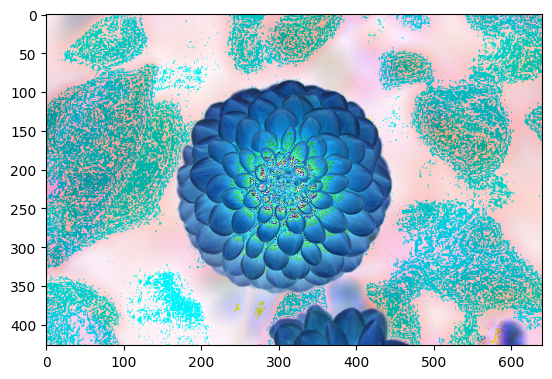

In [4]:
plt.imshow((dataset[1] * 255).astype(np.uint8))
plt.show()

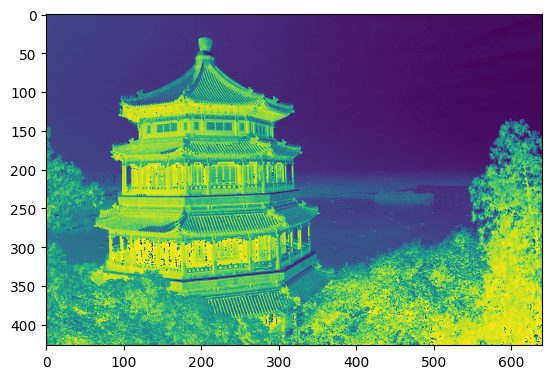

In [5]:
plt.imshow((dataset[0, :, :, 1]* 255).astype(np.uint8))
plt.show()

In [6]:
batch_size, height, width, channels = dataset.shape

In [7]:
dataset.shape

(2, 427, 640, 3)

In [8]:
filters_test = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

In [9]:
filters_test[:, 3, :, 0] = 1 # Vertical Line

In [10]:
filters_test[3, :, :, 1] = 1 # Horizontal Line

In [11]:
tf.compat.v1.disable_eager_execution()

In [12]:
X = tf.compat.v1.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides=[1, 2, 2, 1],
                           padding="VALID")

In [13]:
with tf.compat.v1.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

2024-03-25 12:38:15.131159: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled


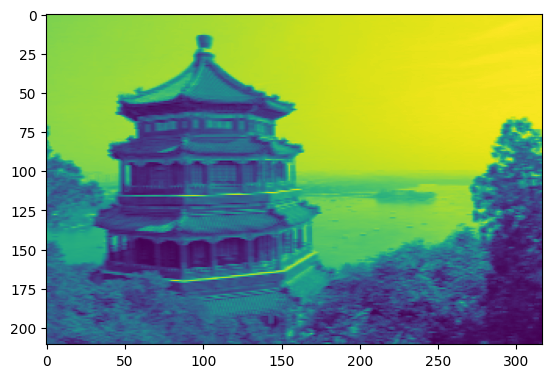

In [14]:
plt.imshow(output[0, :, :, 1])
plt.show()

In [15]:
X = tf.compat.v1.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides=[1, 2, 2, 1],
                           padding="SAME")

In [16]:
with tf.compat.v1.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

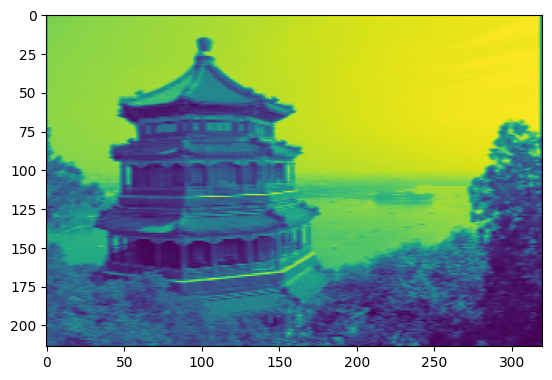

In [17]:
plt.imshow(output[0, :, :, 1])
plt.show()

In [22]:
X = tf.compat.v1.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides=[1, 1, 1, 1],
                           padding="VALID")

In [23]:
with tf.compat.v1.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

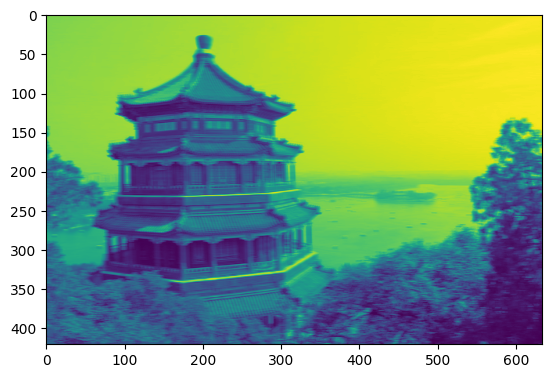

In [24]:
plt.imshow(output[0, :, :, 1])
plt.show()

In [26]:
X = tf.compat.v1.placeholder(tf.float32, shape=(None, height, width, channels))

In [28]:
max_pool = tf.nn.max_pool(X,
                          ksize=[1,2,2,1],
                          strides=[1,2,2,1],
                          padding="VALID"
                         )

In [29]:
with tf.compat.v1.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

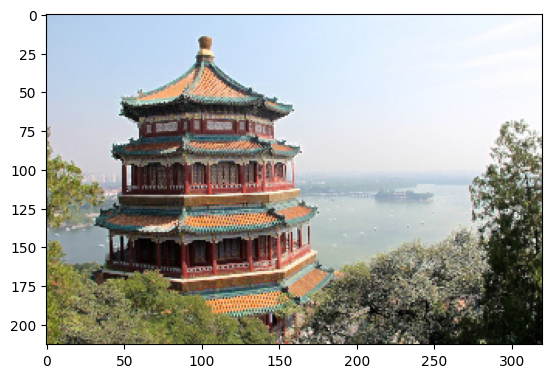

In [30]:
plt.imshow(output[0].astype(np.uint8))
plt.show()

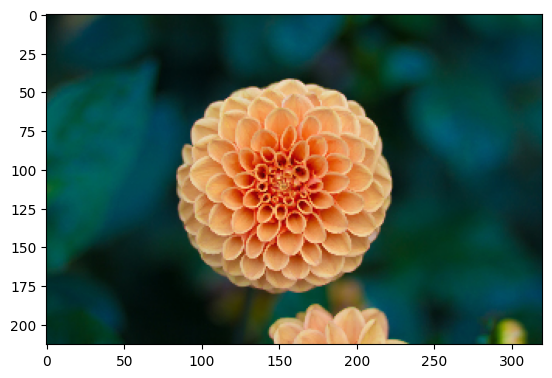

In [32]:
plt.imshow(output[1].astype(np.uint8))

<h3>
    CNN Architectures
</h3>
<h5>
    Fashion MNIST with CNNs
</h5>

In [37]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist

In [38]:
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255

In [39]:
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255

In [40]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]

In [42]:
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [43]:
from functools import partial

In [44]:
tf.random.set_seed(42)

In [47]:
DefaultConv2D = partial(tf.keras.layers.Conv2D,
                       kernel_size=3,
                       padding="same",
                       activation="relu",
                       kernel_initializer="he_normal")

In [48]:
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [49]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

In [50]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10


2024-03-25 14:08:21.692275: W tensorflow/c/c_api.cc:304] Operation '{name:'training/Nadam/conv2d_3_1/bias/v/Assign' id:576 op device:{requested: '', assigned: ''} def:{{{node training/Nadam/conv2d_3_1/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Nadam/conv2d_3_1/bias/v, training/Nadam/conv2d_3_1/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


55000/55000 [==============================] - ETA: 0s - loss: 0.7607 - accuracy: 0.7376

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2024-03-25 14:10:27.940802: W tensorflow/c/c_api.cc:304] Operation '{name:'loss/mul' id:296 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_2_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


55000/55000 [==============================] - 129s 2ms/sample - loss: 0.7607 - accuracy: 0.7376 - val_loss: 0.4376 - val_accuracy: 0.8678
Epoch 2/10
55000/55000 [==============================] - 130s 2ms/sample - loss: 0.4212 - accuracy: 0.8592 - val_loss: 0.3599 - val_accuracy: 0.8892
Epoch 3/10
55000/55000 [==============================] - 127s 2ms/sample - loss: 0.3512 - accuracy: 0.8813 - val_loss: 0.3192 - val_accuracy: 0.8980
Epoch 4/10
55000/55000 [==============================] - 126s 2ms/sample - loss: 0.3160 - accuracy: 0.8919 - val_loss: 0.3014 - val_accuracy: 0.9036
Epoch 5/10
55000/55000 [==============================] - 129s 2ms/sample - loss: 0.2958 - accuracy: 0.9001 - val_loss: 0.2870 - val_accuracy: 0.9010
Epoch 6/10
55000/55000 [==============================] - 127s 2ms/sample - loss: 0.2774 - accuracy: 0.9057 - val_loss: 0.3051 - val_accuracy: 0.9008
Epoch 7/10
55000/55000 [==============================] - 128s 2ms/sample - loss: 0.2644 - accuracy: 0.9098 - v

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-03-25 14:29:55.224655: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_2/Softmax' id:238 op device:{requested: '', assigned: ''} def:{{{node dense_2/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_2/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [52]:
print(score, y_pred)

[0.27910062129497526, 0.9067] [[1.17119495e-19 8.32204200e-21 5.70559718e-20 5.27030484e-17
  2.43502087e-17 3.10449735e-07 3.33324855e-16 2.13846494e-03
  9.67979617e-16 9.97861207e-01]
 [1.33758585e-05 1.34021077e-13 9.96308625e-01 2.37079512e-09
  1.23922911e-03 2.15450192e-18 2.43863650e-03 8.17523960e-16
  6.33844268e-13 8.70145945e-18]
 [6.57709038e-19 1.00000000e+00 1.33586199e-24 9.55804964e-18
  1.28277861e-20 1.31887983e-38 5.25601273e-18 6.30892281e-37
  1.50837611e-30 1.28054980e-34]
 [1.41272223e-18 1.00000000e+00 2.83158210e-24 1.39406089e-17
  4.59926024e-20 0.00000000e+00 5.62950753e-18 1.14995754e-37
  1.30300267e-30 3.22211382e-35]
 [1.43184930e-01 1.55696500e-06 5.78301921e-02 4.01655538e-03
  1.23301940e-02 2.00440748e-08 7.82438219e-01 6.78884371e-09
  1.98283247e-04 5.15753555e-08]
 [1.39700751e-13 1.00000000e+00 8.81042892e-18 6.08028059e-13
  4.48925175e-15 2.04386956e-28 4.05401949e-13 9.12313092e-27
  5.55428305e-22 4.50085526e-25]
 [1.62539482e-10 2.00382001e

<h3>
    Implementing ResNet-34 CNN using keras
</h3>

In [53]:
DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=3,
    strides=1,
    padding="same",
    kernel_initializer="he_normal",
    use_bias=False
)

In [54]:
class ResidualUnit(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            tf.keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            tf.keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                tf.keras.layers.BatchNormalization()
            ]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [61]:
model = tf.keras.Sequential([
    DefaultConv2D(64, kernel_size=7,
                  strides=2,
                  input_shape=[28, 28, 1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same")
])

In [62]:
prev_filters= 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters

In [63]:
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [64]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

In [65]:
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples


2024-03-25 15:11:21.506833: W tensorflow/c/c_api.cc:304] Operation '{name:'residual_unit_23/batch_normalization_54/moving_variance/Assign' id:4771 op device:{requested: '', assigned: ''} def:{{{node residual_unit_23/batch_normalization_54/moving_variance/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](residual_unit_23/batch_normalization_54/moving_variance, residual_unit_23/batch_normalization_54/moving_variance/Initializer/ones)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/2
55000/55000 [==============================] - ETA: 0s - loss: 0.5328 - accuracy: 0.8196

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2024-03-25 15:19:05.308183: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_2/mul' id:5965 op device:{requested: '', assigned: ''} def:{{{node loss_2/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_2/mul/x, loss_2/dense_4_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


55000/55000 [==============================] - 466s 8ms/sample - loss: 0.5328 - accuracy: 0.8196 - val_loss: 0.3435 - val_accuracy: 0.8732
Epoch 2/2
55000/55000 [==============================] - 974s 18ms/sample - loss: 0.3368 - accuracy: 0.8789 - val_loss: 0.3182 - val_accuracy: 0.8842


In [72]:
history.history["loss"]

[0.532769045623866, 0.3368409022071145]

In [75]:
history.model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 14, 14, 64)        3136      
                                                                 
 batch_normalization_36 (Ba  (None, 14, 14, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 residual_unit_16 (Residual  (None, 7, 7, 64)          74240     
 Unit)                                                           
                                                      